In [2]:
import numpy as np
import math 
%matplotlib inline
import matplotlib.pyplot as plt

from sympy import diff, symbols, lambdify, exp
x_ = symbols('x')

def get_f(f_sym):
    f = lambdify(x_, f_sym)
    return f

def get_df(f_sym):
    df_sym = diff(f_sym)
    df = lambdify(x_, df_sym)
    return df

def bisec(f, a, b, e):
    a_n = a
    b_n = b
    k = 0
    
    while abs(b_n-a_n)> e:
        k+=1
        x_n = (a_n+b_n)/2.0
        a_n, b_n = (a_n, x_n) if f(a_n) * f(x_n) < 0 else (x_n, b_n)
        
    return (a_n+b_n)/2, k

def newton(f, df, x_0, e=1e-7, max_iter=1000, m=1):
    x_i, x_prev, i = x_0, x_0 + 2*e, 0
    
    while abs(x_i - x_prev) >= e and i < max_iter:
        
        d =  df(x_i) if df(x_i) != 0.0 else e
        x_i, x_prev, i = x_i - m * f(x_i) / d, x_i, i + 1
        
    return x_i, i

def steff(f, x_0, e=1e-7, max_iter=1000):
    x_i, x_prev, i = x_0, x_0 + 2*e, 0
    
    while abs(x_i - x_prev) >= e and i < max_iter:
        h = f(x_i)
        d = f(x_i + h) - h  
        d = d if d != 0.0 else e
        x_i, x_prev, i = x_i - h * h / d, x_i, i + 1
        
    return x_i, i

### Вариант 29
##### Задание 2.1.29

Даны два уравнения $f(x)=0$ и $g(x)=0$. Найти с точностью $\epsilon=10^{-10}$ все корни уравнений,
содержащиеся на отрезке $[a, b]$. Для решения задачи использовать метод бисекции.
$$f(x)=x^4-\frac{26}{5}x^2+1$$
$$g(x)=x^4-10x^2+25$$
$$[a,b]=[0,3]$$

1. Найти аналитическое решение уравнения $f(x)=0$.
2. Локализовать корни $f(x)=0$ графически.
3. Найти корни уравнения $f(x)=0$ с точностью $\epsilon$ с помощью метода бисекции.
4. Используя встроенные функции, найти корни уравнения $f(x)=0$ с точностью $\epsilon$.
5. Аналогично п. 1-4 попытаться найти корни уравнения $g(x)=0$. Объяснить полученные результаты.

#### Аналитическое решение
$$f(x)=x^4-\frac{26}{5}x^2+1$$
$$f(t)=t^2-\frac{26}{5}t+1$$
$$D_1 = (\frac{13}{5})^2-1=144/25$$
$$ t_1 = \frac{13}{5}+\frac{12}{5} = 5 $$
$$ t_2 = \frac{13}{5}-\frac{12}{5} = \frac{1}{5} $$
$$ x_1 = \sqrt{5}, x_2 = -\sqrt{5}, x_3 = \frac{\sqrt{5}}{5}, x_4 = -\frac{\sqrt{5}}{5} $$

$$ g(x)=x^4-10x^2+25 $$
$$ g(t)=t^2-10t+25 $$
$$ D_1 = 25 - 25 = 0, t=5$$
$$ x_1 = \sqrt{5}, x_2 = -\sqrt{5}$$

In [3]:
a = 0
b = 3
eps = 1e-10

f_sym = x_**4-26/5*x_**2+1
g_sym = x_**4-10*x_**2+25

f = get_f(f_sym)
g = get_f(g_sym)

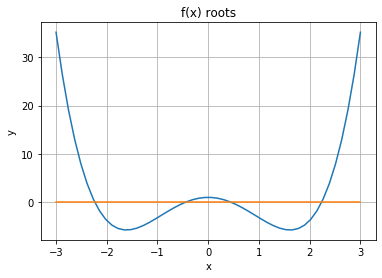

In [4]:
# локализация корней f(x)
x_arr = np.linspace(-3, 3)
zeros = np.zeros(50)
f_arr = [f(x) for x in x_arr]

plt.plot(x_arr, f_arr)
plt.plot(x_arr, zeros)
plt.title("f(x) roots")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

In [5]:
# Нахождение корней методом бисекции f(x)
print("First root = ", bisec(f, a, 1, eps)[0])
print("Second root = ", bisec(f, 1, b, eps)[0])

First root =  0.44721359547111206
Second root =  2.2360679774719756


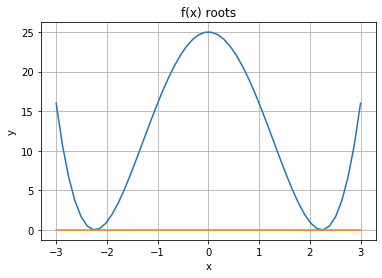

In [6]:
# локализация корней g(x)
x_arr = np.linspace(-3, 3)
zeros = np.zeros(50)
g_arr = [g(x) for x in x_arr]

plt.plot(x_arr, g_arr)
plt.plot(x_arr, zeros)
plt.title("f(x) roots")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

In [7]:
# Нахождение корней методом бисекции g(x)
print("First root = ", bisec(g, a, b, eps)[0])

First root =  2.9999999999563443


Для $g(x)$ метод бисекции не отрабатывает, так как все значения функции, за исключением значения в корне, положительны

##### Задание 2.6.5
 Локализовать корни уравнения $f(x)=0$. Найти их с точностью $\epsilon=10^{-5}$ и $\epsilon=10^{-12}$, спользуя метод Ньютона и метод, указанный в индивидуальном варианте. Сравнить скорость сходимости методов (по числу итераций) для каждого значения $\epsilon$.
 
$$ f(x)=e^{-(x+1)}+x^2+2*x-1 $$
Метод Стиффенсона

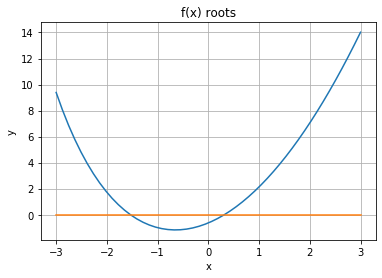

In [8]:
f1_sym = exp(-(x_+1))+x_**2+2*x_-1
f1 = get_f(f1_sym)

# локализация корней g(x)
x_arr = np.linspace(-3, 3)
zeros = np.zeros(50)
f1_arr = [f1(x) for x in x_arr]

plt.plot(x_arr, f1_arr)
plt.plot(x_arr, zeros)
plt.title("f(x) roots")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

In [9]:
eps1 = 1e-5
eps2 = 1e-12

df1 = get_df(f1_sym)
first_root = newton(f1, df1, -1, eps1)
print("Newton Method. E={}, First root={:.5f}, Number of iteration={}".format(eps1, first_root[0], first_root[1]))
second_root = newton(f1, df1, 1, eps1)
print("Newton Method. E={}, Second root={:.5f}, Number of iteration={}".format(eps1, second_root[0], second_root[1]))

first_root = newton(f1, df1, -1, eps2)
print("Newton Method. E={}, First root={:.12f}, Number of iteration={}".format(eps2, first_root[0], first_root[1]))
second_root = newton(f1, df1, 1, eps2)
print("Newton Method. E={}, Second root={:.12f}, Number of iteration={}".format(eps2, second_root[0], second_root[1]))

first_root = steff(f1, -1, eps1)
print("Steffensen Method. E={}, First root={:.5f}, Number of iteration={}".format(eps1, first_root[0], first_root[1]))
second_root = steff(f1, 1, eps1)
print("Steffensen  Method. E={}, Second root={:.5f}, Number of iteration={}".format(eps1, second_root[0], second_root[1]))

first_root = steff(f1, -1, eps2)
print("Steffensen  Method. E={}, First root={:.12f}, Number of iteration={}".format(eps2, first_root[0], first_root[1]))
second_root = steff(f1, 1, eps2)
print("Steffensen  Method. E={}, Second root={:.12f}, Number of iteration={}".format(eps2, second_root[0], second_root[1]))

Newton Method. E=1e-05, First root=-1.53727, Number of iteration=6
Newton Method. E=1e-05, Second root=0.31597, Number of iteration=5
Newton Method. E=1e-12, First root=-1.537274449174, Number of iteration=7
Newton Method. E=1e-12, Second root=0.315973777796, Number of iteration=6
Steffensen Method. E=1e-05, First root=-1.53727, Number of iteration=5
Steffensen  Method. E=1e-05, Second root=0.31597, Number of iteration=6
Steffensen  Method. E=1e-12, First root=-1.537274449174, Number of iteration=6
Steffensen  Method. E=1e-12, Second root=0.315973777796, Number of iteration=7


##### Задание 2.9.5
a) Локализовать корни уравнения $f(x)=0$. Уточнить их с точностью $ \epsilon=10^{-7} $, используя метод
Ньютона. Для поиска кратного корня и определения его кратности следует использовать модификацию метода
Ньютона для случая кратного корня с $m=1,2,3$. При любых ли начальных приближениях такой метод сходится?
b) Рассмотреть уравнение $f(x)+\delta=0$, где $\delta=10^{-8}$. Найти корень кратности 1, используя метод Ньютона.
Применить для нахождения кратного корня соответствующую модификацию* метода Ньютона. Удается ли
найти кратный корень? Если нет, то использовать метод Ньютона с комплексными начальными приближениями.
Сохранился ли кратный корень? Объяснить результаты.
$$f(x)=3x^3-28x^2+80x-64$$


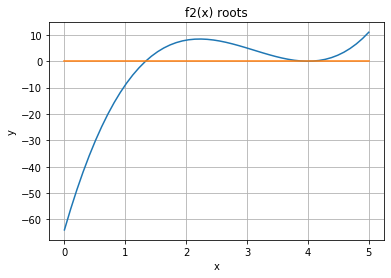

In [10]:
f2_sym = 3*x_**3-28*x_**2+80*x_-64
f2 = get_f(f2_sym)

# локализация корней f2(x)
x_arr = np.linspace(0, 5)
zeros = np.zeros(50)
f2_arr = [f2(x) for x in x_arr]

plt.plot(x_arr, f2_arr)
plt.plot(x_arr, zeros)
plt.title("f2(x) roots")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

In [11]:
eps= 1e-7
df2 = get_df(f2_sym)
first_root = newton(f2, df2, -1, eps)
print("Newton Method. E={}, First root={:.7f}, Number of iteration={}".format(eps, first_root[0], first_root[1]))
second_root = newton(f2, df2, 1000, eps, m=2)
print("Newton Method. E={}, Second root={:.7f}, Number of iteration={}".format(eps, second_root[0], second_root[1]))
second_root = newton(f2, df2, 1000, eps)
print("Newton Method. E={}, Second root={:.7f}, Number of iteration={}".format(eps, second_root[0], second_root[1]))

Newton Method. E=1e-07, First root=1.3333333, Number of iteration=7
Newton Method. E=1e-07, Second root=4.0000000, Number of iteration=11
Newton Method. E=1e-07, Second root=4.0000001, Number of iteration=40


In [12]:
delta = 1e-8
f2_d = get_f(f2_sym+delta)
df2_d = get_df(f2_sym+delta)
first_root = newton(f2_d, df2_d, -1, eps)
print("Newton Method. E={}, First root={:.7f}, Number of iteration={}".format(eps, first_root[0], first_root[1]))
second_root = newton(f2_d, df2_d, 3, eps, m=2)
print("Newton Method. E={}, Second root={:.7f}, Number of iteration={}".format(eps, second_root[0], second_root[1]))

Newton Method. E=1e-07, First root=1.3333333, Number of iteration=7
Newton Method. E=1e-07, Second root=3.9999943, Number of iteration=1000


In [13]:

second_root = newton(f2_d, df2_d, complex(3,3), eps, m=2)
print("Newton Method. E={}, Second root={:.7f}, Number of iteration={}".format(eps, second_root[0], second_root[1]))


Newton Method. E=1e-07, Second root=4.0000310-0.0000846j, Number of iteration=1000


In [14]:

second_root = newton(f2_d, df2_d, complex(3,3), eps)
print("Newton Method. E={}, Second root={:.7f}, Number of iteration={}".format(eps, second_root[0], second_root[1]))

Newton Method. E=1e-07, Second root=4.0000000+0.0000354j, Number of iteration=22


In [15]:
second_root = newton(f2_d, df2_d, complex(3,-3), eps)
print("Newton Method. E={}, Second root={:.7f}, Number of iteration={}".format(eps, second_root[0], second_root[1]))

Newton Method. E=1e-07, Second root=4.0000000-0.0000354j, Number of iteration=22
